In [3]:
%load_ext kedro.extras.extensions.ipython

2022-10-17 07:58:11,575 - root - INFO - Updated path to Kedro project: /Users/francolianza/code/medgc-tesis
2022-10-17 07:58:11,680 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.


/Users/francolianza/miniforge3/envs/domain-adaptation/lib/python3.9/site-packages/kedro/framework/context/context.py:333: UserWarning: Credentials not found in your Kedro project config.
No files found in ['/Users/francolianza/code/medgc-tesis/conf/base', '/Users/francolianza/code/medgc-tesis/conf/local'] matching the glob pattern(s): ['credentials*', 'credentials*/**', '**/credentials*']
  warn(f"Credentials not found in your Kedro project config.\n{str(exc)}")
/Users/francolianza/miniforge3/envs/domain-adaptation/lib/python3.9/site-packages/tllib-0.4-py3.9.egg/tllib/alignment/cdan.py:134: DeprecationWarning: invalid escape sequence \o
/Users/francolianza/miniforge3/envs/domain-adaptation/lib/python3.9/site-packages/tllib-0.4-py3.9.egg/tllib/alignment/cdan.py:134: DeprecationWarning: invalid escape sequence \o
/Users/francolianza/miniforge3/envs/domain-adaptation/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See ht

2022-10-17 07:58:13,043 - root - INFO - ** Kedro project MEDGC Tesis
2022-10-17 07:58:13,043 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


In [4]:
predicciones_resnet_afn = catalog.load("modelo_resnet_afn_predicciones")
predicciones_resnet_dann = catalog.load("modelo_resnet_dann_predicciones")
predicciones_resnet_mdd = catalog.load("modelo_resnet_mdd_predicciones")
predicciones_resnet_adda = catalog.load("modelo_resnet_adda_predicciones")
predicciones_resnet_source_only = catalog.load("modelo_resnet_source_only_predicciones")

predicciones_lenet_afn = catalog.load("modelo_lenet_afn_predicciones")
predicciones_lenet_dann = catalog.load("modelo_lenet_dann_predicciones")
predicciones_lenet_mdd = catalog.load("modelo_lenet_mdd_predicciones")
predicciones_lenet_adda = catalog.load("modelo_lenet_adda_predicciones")
predicciones_lenet_source_only = catalog.load("modelo_lenet_source_only_predicciones")

2022-10-17 07:58:13,061 - kedro.io.data_catalog - INFO - Loading data from `modelo_resnet_afn_predicciones` (CSVDataSet)...
2022-10-17 07:58:13,148 - kedro.io.data_catalog - INFO - Loading data from `modelo_resnet_dann_predicciones` (CSVDataSet)...
2022-10-17 07:58:13,235 - kedro.io.data_catalog - INFO - Loading data from `modelo_resnet_mdd_predicciones` (CSVDataSet)...
2022-10-17 07:58:13,320 - kedro.io.data_catalog - INFO - Loading data from `modelo_resnet_adda_predicciones` (CSVDataSet)...
2022-10-17 07:58:13,408 - kedro.io.data_catalog - INFO - Loading data from `modelo_resnet_source_only_predicciones` (CSVDataSet)...
2022-10-17 07:58:13,491 - kedro.io.data_catalog - INFO - Loading data from `modelo_lenet_afn_predicciones` (CSVDataSet)...
2022-10-17 07:58:13,573 - kedro.io.data_catalog - INFO - Loading data from `modelo_lenet_dann_predicciones` (CSVDataSet)...
2022-10-17 07:58:13,656 - kedro.io.data_catalog - INFO - Loading data from `modelo_lenet_mdd_predicciones` (CSVDataSet)...


In [5]:
import pandas as pd

pd.set_option('display.max_rows', 500)

In [6]:
predicciones_resnet_source_only["algoritmo"] = "Sin Adaptación de Dominio"
predicciones_resnet_afn["algoritmo"] = "AFN"
predicciones_resnet_dann["algoritmo"] = "DANN"
predicciones_resnet_mdd["algoritmo"] = "MDD"
predicciones_resnet_adda["algoritmo"] = "ADDA"
predicciones_resnet_source_only["modelo"] = "ResNet"
predicciones_resnet_afn["modelo"] = "ResNet"
predicciones_resnet_dann["modelo"] = "ResNet"
predicciones_resnet_mdd["modelo"] = "ResNet"
predicciones_resnet_adda["modelo"] = "ResNet"

predicciones_lenet_source_only["algoritmo"] = "Sin Adaptación de Dominio"
predicciones_lenet_afn["algoritmo"] = "AFN"
predicciones_lenet_dann["algoritmo"] = "DANN"
predicciones_lenet_mdd["algoritmo"] = "MDD"
predicciones_lenet_adda["algoritmo"] = "ADDA"
predicciones_lenet_source_only["modelo"] = "LeNet"
predicciones_lenet_afn["modelo"] = "LeNet"
predicciones_lenet_dann["modelo"] = "LeNet"
predicciones_lenet_mdd["modelo"] = "LeNet"
predicciones_lenet_adda["modelo"] = "LeNet"

predicciones = pd.concat(
    [
        predicciones_resnet_source_only,
        predicciones_resnet_afn,
        predicciones_resnet_mdd,
        predicciones_resnet_dann,
        predicciones_resnet_adda,
        predicciones_lenet_source_only,
        predicciones_lenet_afn,
        predicciones_lenet_mdd,
        predicciones_lenet_dann,
        predicciones_lenet_adda,
    ],
    ignore_index=True,
)

predicciones = predicciones.drop(
    columns=[
        "cant_digitos",
        "min_size_digitos",
        "max_size_digitos",
        "min_prop_blanco_digitos",
        "max_prop_blanco_digitos",
    ]
)

predicciones["acierto"] = (predicciones["votos"] == predicciones["voto_predicho"]).astype(int)

In [7]:
predicciones.groupby(['algoritmo', 'partido', 'tipo']).agg(
    cantidad_real=('votos', 'sum'),
    cantidad_pred=('voto_predicho', 'sum'),
    iou_promedio=('iou', 'mean'),
    acierto_exacto_promedio=('acierto', 'mean'),
)

cantidad_real  \
algoritmo                 partido                                        tipo                                  
ADDA                      FRENTE AMPLIO PROGRESISTA                      DIPUTADOS NACIONALES         358970   
                                                                         SENADORES NACIONALES         368334   
                          FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD DIPUTADOS NACIONALES          64608   
                                                                         SENADORES NACIONALES          64288   
                          FRENTE DE TODOS                                DIPUTADOS NACIONALES         921520   
                                                                         SENADORES NACIONALES         952316   
                          JUNTOS POR EL CAMBIO                           DIPUTADOS NACIONALES        1189380   
                                                                         SENADORES NACIONALES        1198670   
                          PODEMOS                                        DIPUTADOS NACIONALES          53442   
                                                                         SENADORES NACIONALES          53178   
                          PRIMERO SANTA FE                               DIPUTADOS NACIONALES          45364   
                                                                         SENADORES NACIONALES          49054   
                          SOBERANIA POPULAR                              DIPUTADOS NACIONALES         133220   
                                                                         SENADORES NACIONALES         104772   
                          SOMOS FUTURO                                   DIPUTADOS NACIONALES          67934   
                                                                         SENADORES NACIONALES          65376   
                          UNITE POR LA LIBERTAD Y LA DIGNIDAD            DIPUTADOS NACIONALES         117674   
                                                                         SENADORES NACIONALES         111200   
AFN                       FRENTE AMPLIO PROGRESISTA                      DIPUTADOS NACIONALES         358970   
                                                                         SENADORES NACIONALES         368334   
                          FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD DIPUTADOS NACIONALES          64608   
                                                                         SENADORES NACIONALES          64288   
                          FRENTE DE TODOS                                DIPUTADOS NACIONALES         921520   
                                                                         SENADORES NACIONALES         952316   
                          JUNTOS POR EL CAMBIO                           DIPUTADOS NACIONALES        1189380   
                                                                         SENADORES NACIONALES        1198670   
                          PODEMOS                                        DIPUTADOS NACIONALES          53442   
                                                                         SENADORES NACIONALES          53178   
                          PRIMERO SANTA FE                               DIPUTADOS NACIONALES          45364   
                                                                         SENADORES NACIONALES          49054   
                          SOBERANIA POPULAR                              DIPUTADOS NACIONALES         133220   
                                                                         SENADORES NACIONALES         104772   
                          SOMOS FUTURO                                   DIPUTADOS NACIONALES          67934   
                                                                         SENADORES NACIONALES          65376   
                          UNITE POR LA LIBERTAD Y LA DIGNIDAD  

In [8]:
predicciones.groupby(['algoritmo', 'partido']).agg(
    cantidad_real=('votos', 'sum'),
    cantidad_pred=('voto_predicho', 'sum'),
    iou_promedio=('iou', 'mean'),
    acierto_exacto_promedio=('acierto', 'mean'),
)

cantidad_real  \
algoritmo                 partido                                                         
ADDA                      FRENTE AMPLIO PROGRESISTA                              727304   
                          FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD         128896   
                          FRENTE DE TODOS                                       1873836   
                          JUNTOS POR EL CAMBIO                                  2388050   
                          PODEMOS                                                106620   
                          PRIMERO SANTA FE                                        94418   
                          SOBERANIA POPULAR                                      237992   
                          SOMOS FUTURO                                           133310   
                          UNITE POR LA LIBERTAD Y LA DIGNIDAD                    228874   
AFN                       FRENTE AMPLIO PROGRESISTA                              727304   
                          FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD         128896   
                          FRENTE DE TODOS                                       1873836   
                          JUNTOS POR EL CAMBIO                                  2388050   
                          PODEMOS                                                106620   
                          PRIMERO SANTA FE                                        94418   
                          SOBERANIA POPULAR                                      237992   
                          SOMOS FUTURO                                           133310   
                          UNITE POR LA LIBERTAD Y LA DIGNIDAD                    228874   
DANN                      FRENTE AMPLIO PROGRESISTA                              727304   
                          FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD         128896   
                          FRENTE DE TODOS                                       1873836   
                          JUNTOS POR EL CAMBIO                                  2388050   
                          PODEMOS                                                106620   
                          PRIMERO SANTA FE                                        94418   
                          SOBERANIA POPULAR                                      237992   
                          SOMOS FUTURO                                           133310   
                          UNITE POR LA LIBERTAD Y LA DIGNIDAD                    228874   
MDD                       FRENTE AMPLIO PROGRESISTA                              727304   
                          FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD         128896   
                          FRENTE DE TODOS                                       1873836   
                          JUNTOS POR EL CAMBIO                                  2388050   
                          PODEMOS                                                106620   
                          PRIMERO SANTA FE                                        94418   
                          SOBERANIA POPULAR                                      237992   
                          SOMOS FUTURO                                           133310   
                          UNITE POR LA LIBERTAD Y LA DIGNIDAD                    228874   
Sin Adaptación de Dominio FRENTE AMPLIO PROGRESISTA                              727304   
                          FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD         128896   
                          FRENTE DE TODOS                                       1873836   
                          JUNTOS POR EL CAMBIO                                  2388050   
                          PODEMOS                                                106620   
                          PRIMERO SANTA FE                                        94418   
                          SOBERANIA POPULAR                           

In [9]:
ious = predicciones.groupby(['algoritmo', 'modelo']).agg(
    iou=('iou', 'mean'),
)
aciertos = (
    predicciones
    .groupby(['algoritmo', 'modelo', 'id_telegrama'], as_index=False)
    .agg(aciertos=('acierto', 'sum'))
    .groupby(['algoritmo', 'modelo'])
    .agg(aciertos=('aciertos', 'median'))
    .round()
)
print(ious.merge(aciertos, left_index=True, right_index=True).style.to_latex())

\begin{tabular}{llrr}
 &  & iou & aciertos \\
algoritmo & modelo &  &  \\
\multirow[c]{2}{*}{ADDA} & LeNet & 0.640602 & 10.000000 \\
 & ResNet & 0.676325 & 11.000000 \\
\multirow[c]{2}{*}{AFN} & LeNet & 0.649380 & 11.000000 \\
 & ResNet & 0.748665 & 13.000000 \\
\multirow[c]{2}{*}{DANN} & LeNet & 0.702419 & 12.000000 \\
 & ResNet & 0.694174 & 12.000000 \\
\multirow[c]{2}{*}{MDD} & LeNet & 0.580163 & 9.000000 \\
 & ResNet & 0.545117 & 8.000000 \\
\multirow[c]{2}{*}{Sin Adaptación de Dominio} & LeNet & 0.471569 & 6.000000 \\
 & ResNet & 0.449412 & 4.000000 \\
\end{tabular}



In [10]:
from matplotlib import pyplot as plt
from itertools import product

In [11]:
models = ['ResNet', 'LeNet']
da_techniques = ['Sin Adaptación de Dominio', 'MDD', 'DANN', 'AFN', 'ADDA']
algorithms = list(product(models, da_techniques))

In [12]:
def plot_iou_by_algorithm(predicciones):
    ious = (
        predicciones
        .groupby(['algoritmo', 'modelo', 'id_telegrama'], as_index=False)
        .agg(iou=('iou', 'mean'))
    )

    fig, axes = plt.subplots(ncols=len(da_techniques), nrows=1, figsize=(25, 4))
    axes = axes.flatten()
    for da_technique, ax1 in zip(da_techniques, axes):
        fig2, ax2 = plt.subplots(figsize=(4, 4))
        for model in models:
            data = ious.query("algoritmo == @da_technique").query("modelo == @model").drop(columns=['algoritmo']).rename(columns={'iou': model})
            data.hist(alpha=0.5, bins=15, ax=ax1, legend=True)
            data.hist(alpha=0.5, bins=15, ax=ax2, legend=True)
        
        for ax in [ax1, ax2]:
            ax.set_title(f'Distribución de $IoU$, {da_technique}')
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1_500)
            ax.set_xlabel('IOU promedio por telegrama')
            ax.set_ylabel('# Telegramas')

    plt.show()
    return ious

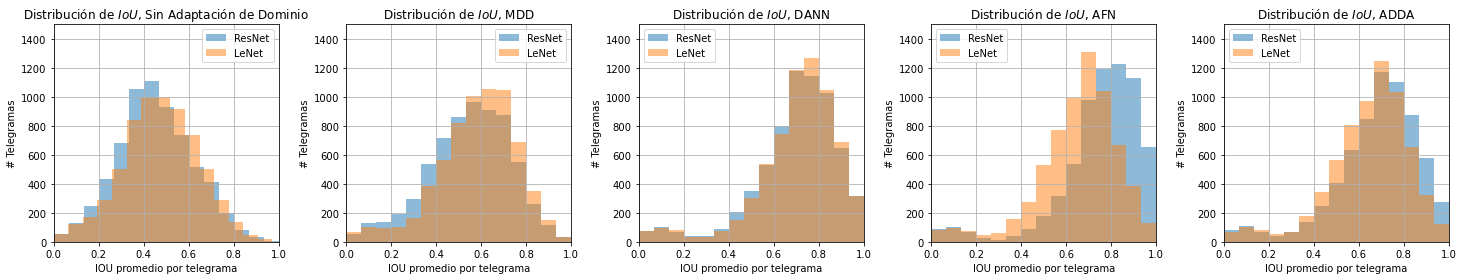

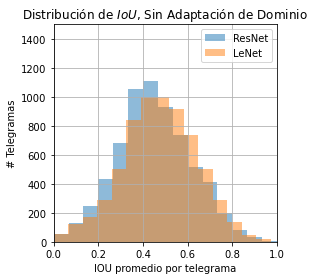

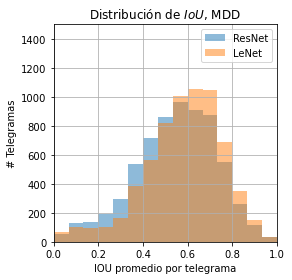

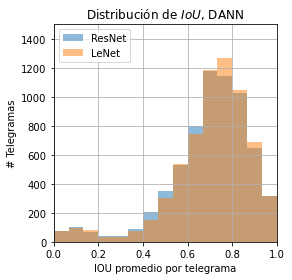

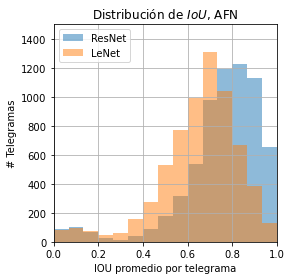

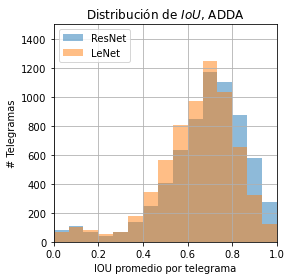

In [13]:
ious = plot_iou_by_algorithm(predicciones)

In [14]:
def plot_iou_by_model(predicciones):
    ious = (
        predicciones
        .groupby(['algoritmo', 'modelo', 'id_telegrama'], as_index=False)
        .agg(iou=('iou', 'mean'))
    )

    fig, axes = plt.subplots(ncols=len(models), nrows=1, figsize=(15, 7))
    axes = axes.flatten()
    for model, ax in zip(models, axes):
        for da_technique in da_techniques:
            data = ious.query("algoritmo == @da_technique").query("modelo == @model").drop(columns=['algoritmo']).rename(columns={'iou': da_technique})
            data.hist(alpha=0.3, bins=20, ax=ax, legend=True)
        ax.set_title(f'{model}')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1_500)
        ax.set_xlabel('IOU')
        ax.set_ylabel('# Telegramas')

    plt.show()
    return ious

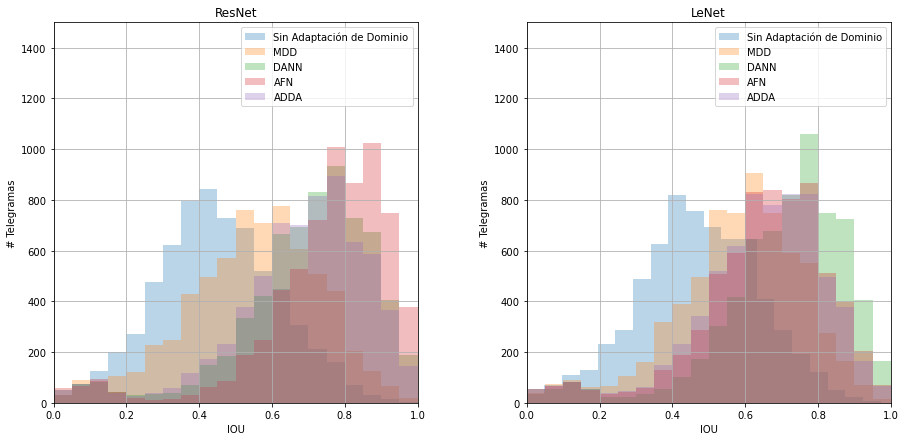

In [15]:
ious = plot_iou_by_model(predicciones)

In [25]:
(
        predicciones
        .groupby(['algoritmo', 'modelo', 'id_telegrama'], as_index=False)
        .agg(aciertos=('acierto', 'sum'))
        .groupby(['algoritmo', 'modelo', 'aciertos'], as_index=False)
        .agg(cantidad=('algoritmo', 'count'))
    )

,algoritmo,modelo,aciertos,cantidad
0,ADDA,LeNet,0,176
1,ADDA,LeNet,1,73
2,ADDA,LeNet,2,75
3,ADDA,LeNet,3,79
4,ADDA,LeNet,4,126
5,ADDA,LeNet,5,198
6,ADDA,LeNet,6,301
7,ADDA,LeNet,7,415
8,ADDA,LeNet,8,536
9,ADDA,LeNet,9,683


In [62]:
import seaborn as sns

def plot_aciertos_by_algorithm(predicciones):
    aciertos = (
        predicciones
        .groupby(['algoritmo', 'modelo', 'id_telegrama'], as_index=False)
        .agg(aciertos=('acierto', 'sum'))
        .groupby(['algoritmo', 'modelo', 'aciertos'], as_index=False)
        .agg(cantidad=('algoritmo', 'count'))
    )

    fig, axes = plt.subplots(ncols=len(da_techniques), nrows=1, figsize=(25, 4))
    axes = axes.flatten()
    i = 0
    for da_technique in da_techniques:
        ax1 = axes[i]
        data = aciertos.query("algoritmo == @da_technique").rename(columns={
            'modelo': 'Modelo',
        })
        fig2, ax2 = plt.subplots()

        for ax in [ax1, ax2]:
            sns.barplot(x = "aciertos",
                y = "cantidad",       
                hue = "Modelo",
                data = data,
                ax= ax)

            ax.set_title(f'{da_technique}')
            ax.grid()
            ax.legend(loc="upper right")
            ax.set_xlim(0, 18)
            ax.set_ylim(0, 1_500)
            ax.set_ylabel("Cantidad de telegramas")
            ax.set_xlabel("Cantidad de aciertos")
        i += 1

        
    fig.tight_layout()
    plt.show()
    return aciertos

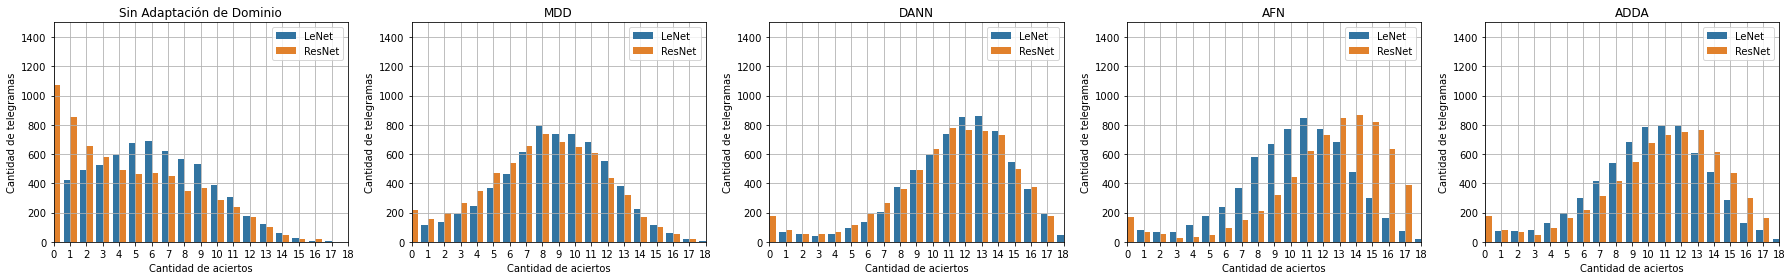

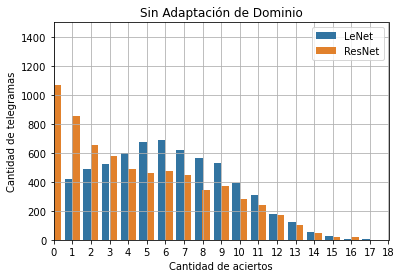

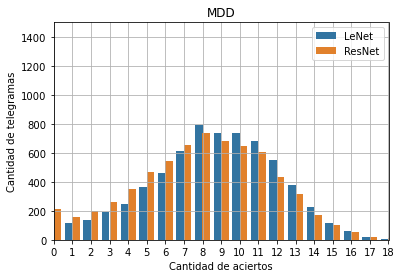

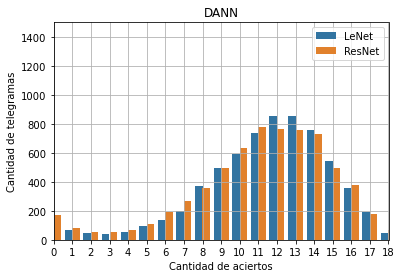

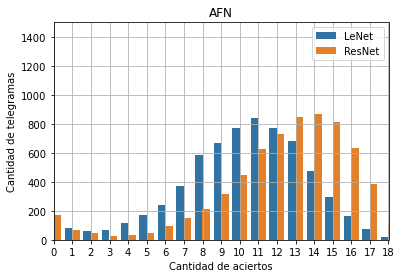

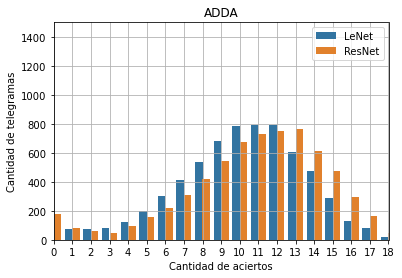

In [63]:
aciertos = plot_aciertos_by_algorithm(predicciones)

In [55]:
telegramas_mal_extraidos = (
    predicciones
    .query("algoritmo == 'target_only'")
    .groupby('id_telegrama', as_index=False)
    .agg(iou=('iou', 'mean'))
    .query("iou < 0.3")
    ['id_telegrama']
    .values
)

In [15]:
len(telegramas_mal_extraidos)

274

In [16]:
predicciones_bien_extraidas = predicciones[~predicciones.id_telegrama.isin(telegramas_mal_extraidos)]

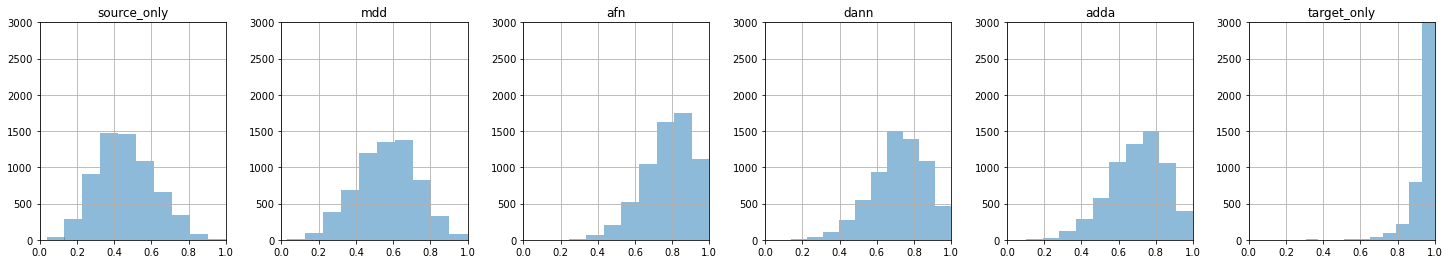

In [17]:
ious_bien_extraidas = plot_iou_by_algorithm(predicciones_bien_extraidas)

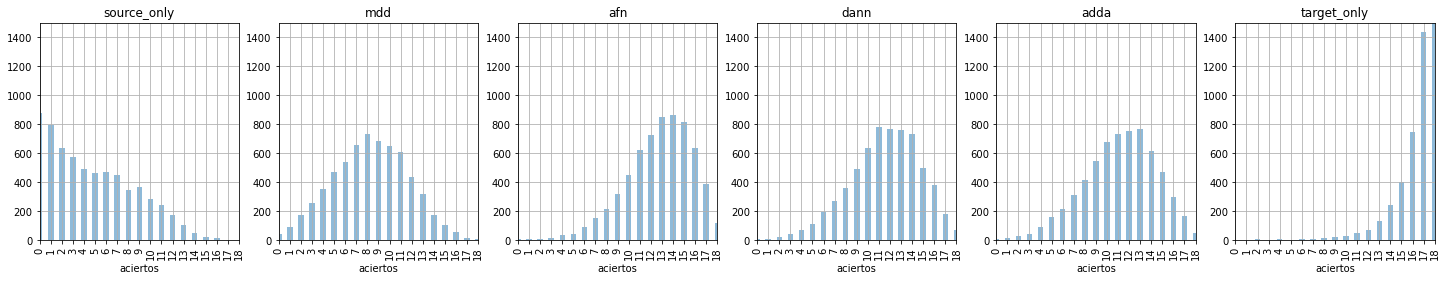

In [18]:
aciertos_bien_extraidas = plot_aciertos_by_algorithm(predicciones_bien_extraidas)

In [239]:
(
    predicciones
    .query("algoritmo == 'AFN'")
    .groupby('id_telegrama', as_index=False)
    .agg(iou=('iou', 'mean'), accuracy=('acierto', 'mean'))
    .query("iou < 0.2")
    .sort_values(by='iou', ascending=True)
).head(10)

,id_telegrama,iou,accuracy
6505,2102108037X,0.000000,0.0
5639,2101606922X,0.000000,0.0
6533,2102208066X,0.000000,0.0
1733,2100802123X,0.009259,0.0
2110,2100902564X,0.009259,0.0
4989,2101306075X,0.013889,0.0
3401,2101304086X,0.013889,0.0
4202,2101305039X,0.013889,0.0
4815,2101305841X,0.013889,0.0
339,2100300394X,0.013889,0.0


In [232]:
from PIL import Image
import cv2
from IPython.display import display

In [207]:
def imgshow(img) -> None:
    display(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))

In [268]:
img_id = '2101304086X'

In [273]:
(
    predicciones
    .query(f"id_telegrama == '{img_id}' and algoritmo == 'AFN'")
)

,id_telegrama,partido,tipo,mesa,votos,voto_predicho,iou,algoritmo,modelo,acierto
180468,2101304086X,UNITE POR LA LIBERTAD Y LA DIGNIDAD,SENADORES NACIONALES,04086X,5,2,0.00,AFN,ResNet,0
180469,2101304086X,UNITE POR LA LIBERTAD Y LA DIGNIDAD,DIPUTADOS NACIONALES,04086X,7,0,0.00,AFN,ResNet,0
180470,2101304086X,FRENTE AMPLIO PROGRESISTA,SENADORES NACIONALES,04086X,53,46,0.00,AFN,ResNet,0
180471,2101304086X,FRENTE AMPLIO PROGRESISTA,DIPUTADOS NACIONALES,04086X,46,106,0.25,AFN,ResNet,0
180472,2101304086X,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,SENADORES NACIONALES,04086X,2,6,0.00,AFN,ResNet,0
180473,2101304086X,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,DIPUTADOS NACIONALES,04086X,2,3,0.00,AFN,ResNet,0
180474,2101304086X,JUNTOS POR EL CAMBIO,SENADORES NACIONALES,04086X,144,0,0.00,AFN,ResNet,0
180475,2101304086X,JUNTOS POR EL CAMBIO,DIPUTADOS NACIONALES,04086X,146,0,0.00,AFN,ResNet,0
180476,2101304086X,PRIMERO SANTA FE,SENADORES NACIONALES,04086X,6,1,0.00,AFN,ResNet,0
180477,2101304086X,PRIMERO SANTA FE,DIPUTADOS NACIONALES,04086X,3,2,0.00,AFN,ResNet,0


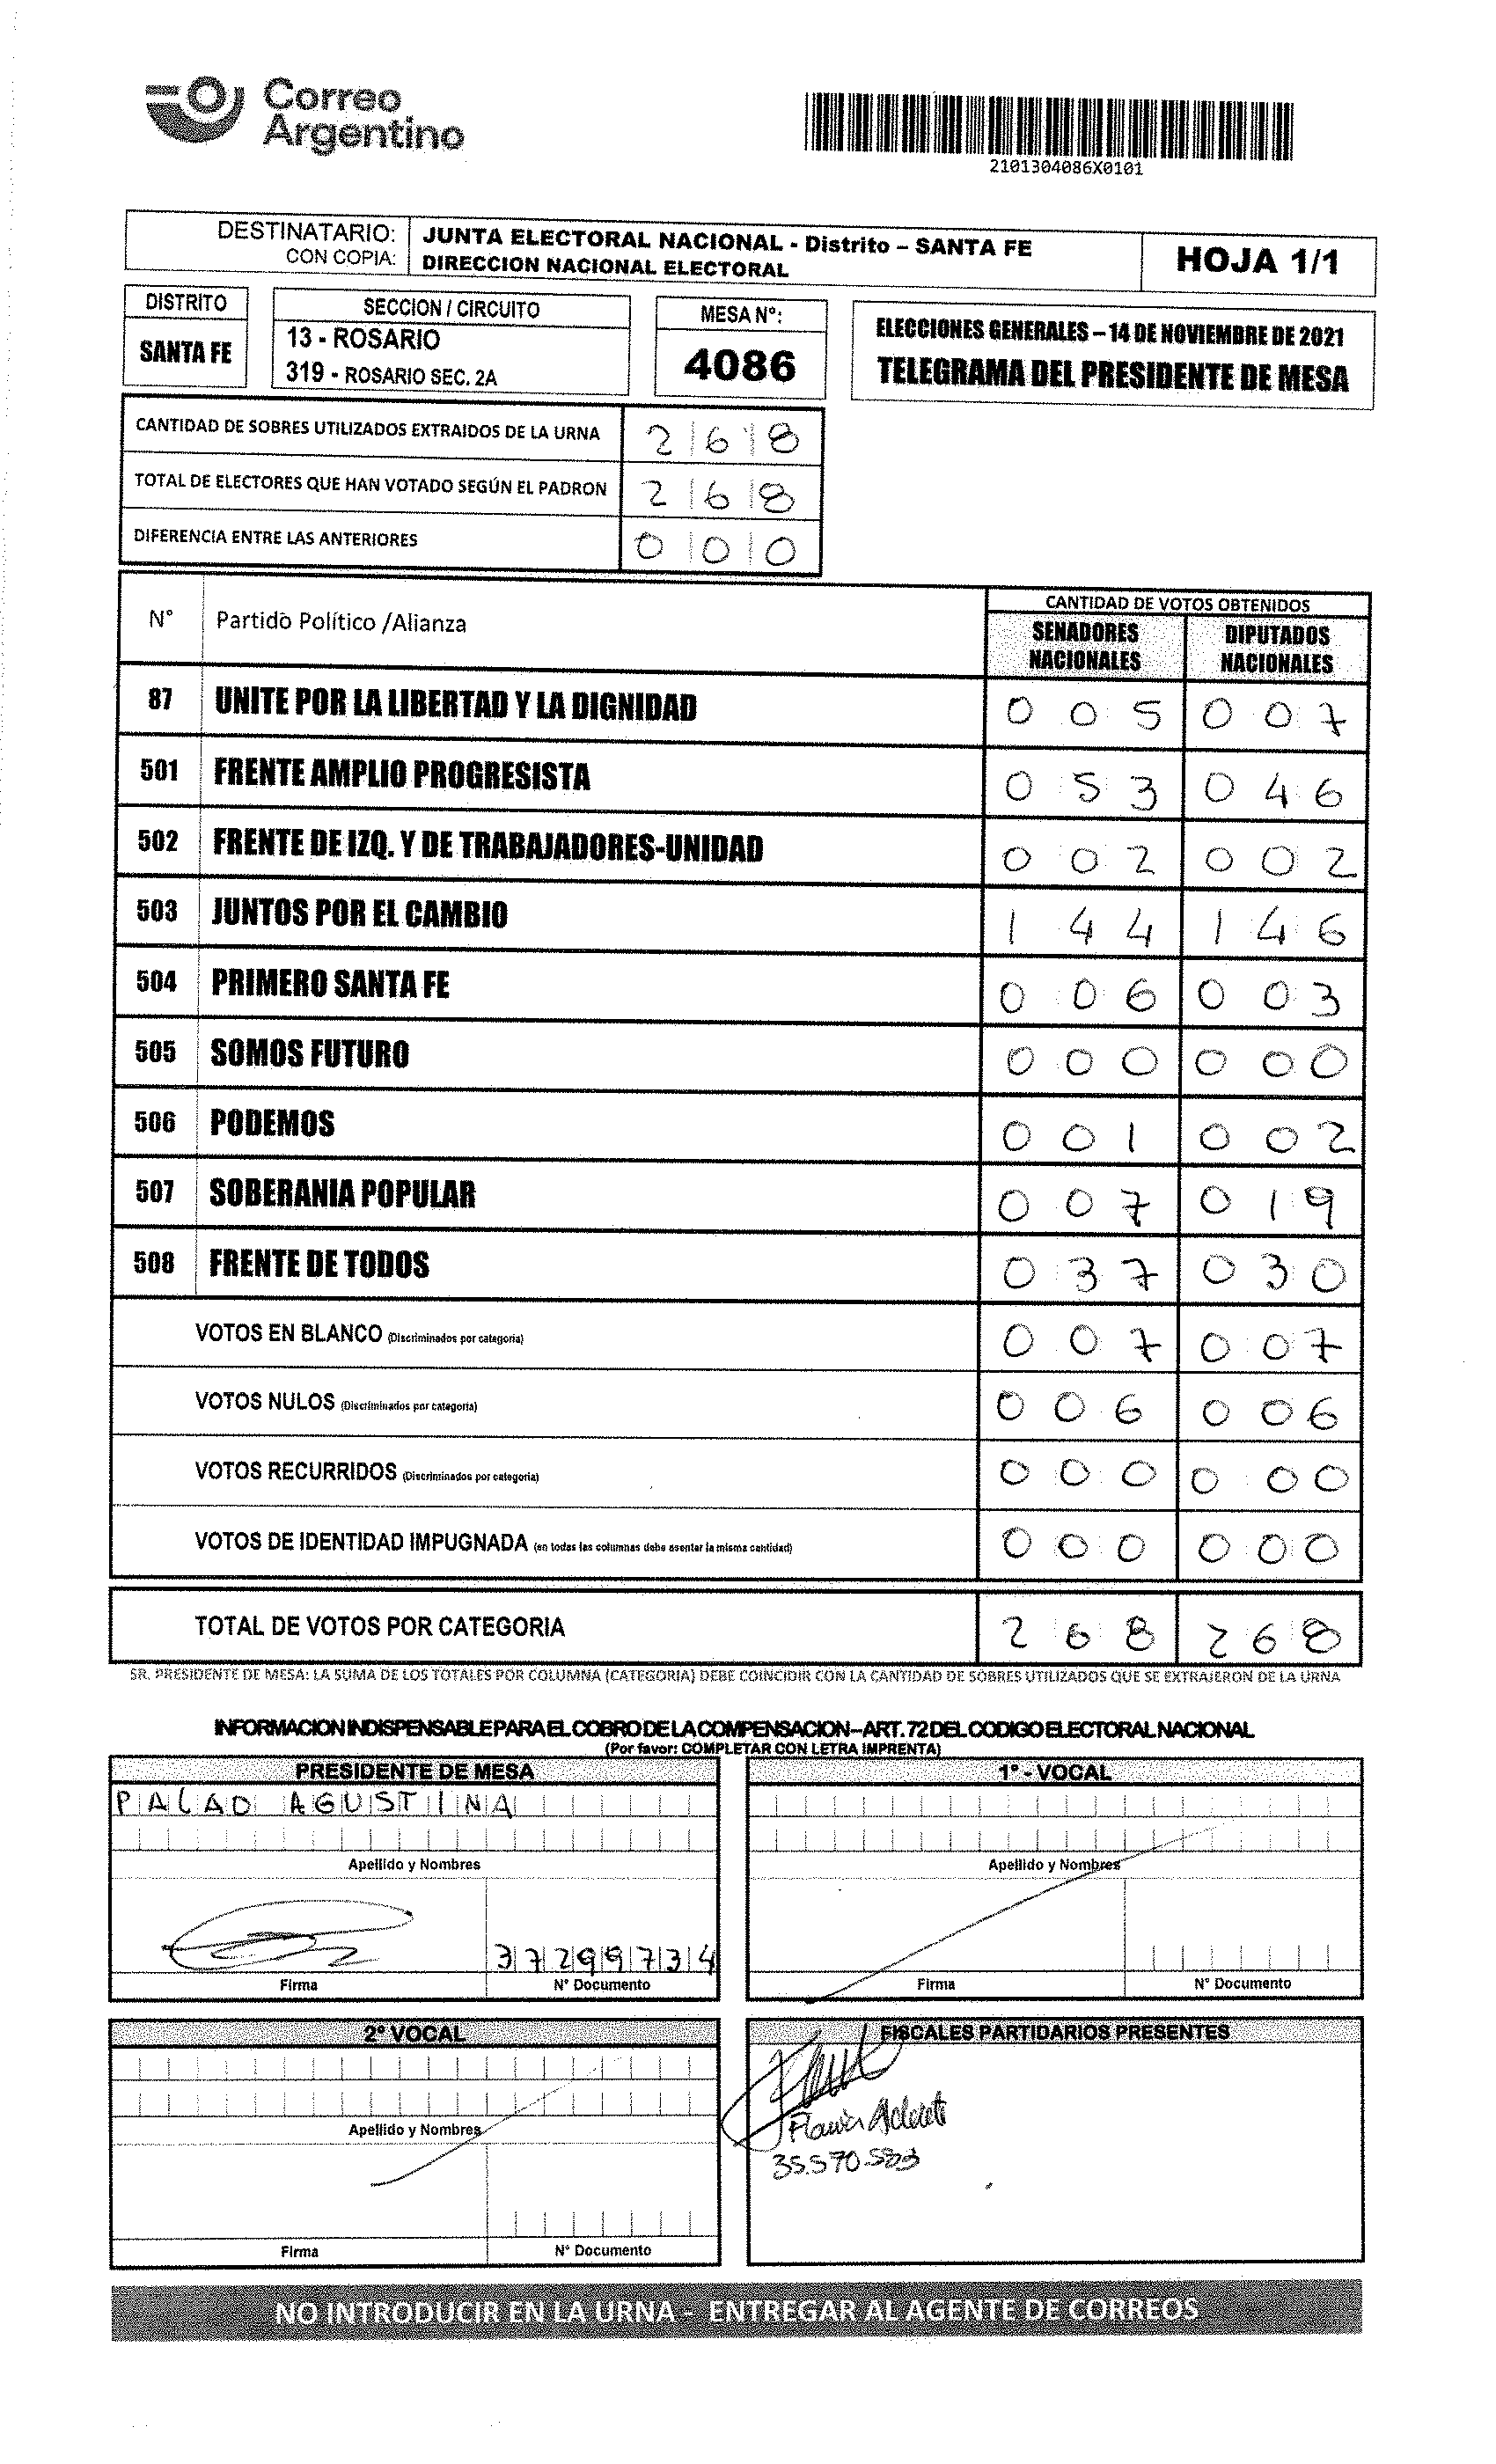

In [270]:
img = cv2.imread(f'../data/01_raw/telegramas/{img_id}.tiff')
imgshow(img)

In [271]:
(
    predicciones
    .query(f"id_telegrama == '{img_id}'")
    .query("algoritmo == 'afn'")
)

,id_telegrama,partido,tipo,mesa,votos,voto_predicho,iou,algoritmo,modelo,acierto
